In [1]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 4.4 MB/s 
     |████████████████████████████████| 3.3 MB 38.2 MB/s 
     |████████████████████████████████| 61 kB 438 kB/s 
     |████████████████████████████████| 596 kB 59.0 MB/s 
     |████████████████████████████████| 895 kB 47.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [66]:
import string
import re
import numpy as np
from nltk.corpus import words
from nltk.tokenize import word_tokenize
import pandas as pd
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore")

import requests
import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
path ='https://raw.githubusercontent.com/tanvi-ap/Covid19StanceDetection/main/Train.csv'

r= requests.get(path)
dtf = pd.read_csv(io.StringIO(r.text),index_col=0)
dtf=dtf.rename(columns={"label":"Stance", "safe_text":"text"})
dtf["Target"]="Covid19 Vaccination"

In [33]:
dtf.head()

,text,Stance,agreement,Target
tweet_id,,,,
CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0,Covid19 Vaccination
E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0,Covid19 Vaccination
M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0,Covid19 Vaccination
1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0,Covid19 Vaccination
J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0,Covid19 Vaccination


In [43]:
from keras.preprocessing.text import Tokenizer

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 100
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(dtf['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 15118 unique tokens.


In [44]:
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(dtf['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

max_len = 0
for t in X:
    if max_len < len(t):
        max_len = len(t)

X1 = tokenizer.texts_to_sequences(dtf['text'].values)
X1 = pad_sequences(X1, maxlen=max_len)

print('Shape of data tensor:', X.shape)

Shape of data tensor: (10001, 100)


In [45]:
Y = pd.get_dummies(dtf['Stance']).values

Y1 = pd.get_dummies(dtf['Stance']).values

print('Shape of label tensor:', Y.shape)

Shape of label tensor: (10001, 3)


In [48]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(dtf['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 15118 unique tokens.


In [49]:
X = tokenizer.texts_to_sequences(dtf['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (10001, 250)


In [50]:
Y = pd.get_dummies(dtf['Stance']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (10001, 3)


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9000, 250) (9000, 3)
(1001, 250) (1001, 3)


In [52]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
#model.add(Dense(13, activation='softmax'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

#history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


In [53]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_8 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_8 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 3)                 303       
                                                                 
Total params: 5,080,703
Trainable params: 5,080,703
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
127/127 [==============================] - 106s 804ms/step - loss: 0.8201 - accuracy: 0.6248 - val_loss: 0.6923 - val_accuracy: 0.7200
Epoch 2/5
127/127 [==============================] - 102s 804ms/step - loss: 0.5613 - accuracy: 0.7741 - val_loss: 0.6504 - val_accuracy: 0.7433
Epoch 3/5
127/127 [==============================] - 101s 797ms/step - loss: 0.3887 - accuracy: 0.8543 - val_loss: 0.7323 - val_accuracy: 0.7244
Epoch 4/5
127/127 [==============================] - 101s 791ms/step - loss: 0.2750 - accuracy: 0.9037 - val_loss: 0.8912 - val_accuracy: 0.7100
Epoch 5/5
127/127 [==============================] - 101s 795ms/step - loss: 0.2007 - accuracy: 0.9278 - val_loss: 0.9400 - val_accuracy: 0.7111


In [42]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

32/32 [==============================] - 2s 75ms/step - loss: 0.9448 - accuracy: 0.6933
Test set
  Loss: 0.945
  Accuracy: 0.693


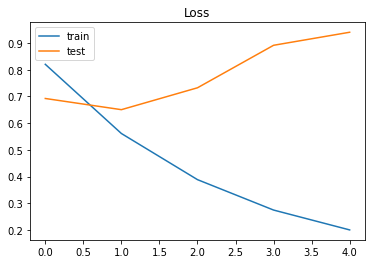

In [56]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [60]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

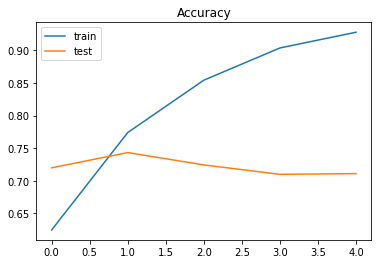

In [63]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();